In [134]:
# imports
%matplotlib inline
from sklearn.datasets import load_boston
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [135]:
(data,target) = load_boston(return_X_y=True)

ones = np.ones((506,14))
print(ones.shape)
for i in range(0,506):
    for j in range(0,13):
        ones[i,j] = data[i,j]
data = ones
print(data)

(506L, 14L)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]]


In [136]:
# split into train and test
# initial testing and train without cross validation
training_data = data[0:400]
training_labels = target[0:400]
testing_data = data[400:507]
testing_labbels = data[400:507]



In [137]:
#print(data.T)
def LSRegression(new_data,training_labels):
    multi = np.matmul(new_data.T,new_data)
    multi_inv = inv(multi)
    multi_2 = np.matmul(multi_inv,new_data.T)
    final = np.matmul(multi_2,training_labels)
    y_hat = np.matmul(new_data,final)
    #print(y_hat.shape)
    #print(y_hat)
    return(y_hat)

    
    

In [138]:
def LSError(actual,predicted):
    error = np.linalg.norm(actual-predicted,2)
    return error


In [139]:
print(LSError(training_labels,LSRegression(training_data,training_labels)))

94.45681676652765


('LS error ', 99.66915725673414)
('LS error ', 94.91068410032413)
('LS error ', 92.63235006704716)
('LS error ', 72.32958596677354)
('LS error ', 95.9612509511673)
('Average error is', 91.10060566840926)


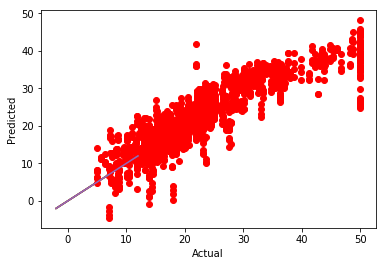

In [140]:
# CROSS VALIDATION SPLIT
import random
# create a split
split_labels = np.array_split(target,5)
#print(split_labels[1].shape)

split = np.array_split(data, 5)
sum_error = 0
# take one as test and the rest take as training
for i in range(5):
    training_data_cv = []
    test_data_cv = split[i]
    training_labels_cv = []
    test_labels_cv = split_labels[i]
    
    for j in range(5):
        if j!=i:
            training_data_cv.extend(split[j].tolist())
            training_labels_cv.extend(split_labels[j].tolist())
    training_data_cv = np.asarray(training_data_cv)
    training_labels_cv = np.asarray(training_labels_cv)
    #print(training_labels_cv.shape)
    # now that we have train and test data we have to call our LS Error from this
    
    print("LS error ", LSError(training_labels_cv,LSRegression(training_data_cv,training_labels_cv)))
    sum_error = sum_error + LSError(training_labels_cv,LSRegression(training_data_cv,training_labels_cv))

    plt.plot(training_labels_cv,LSRegression(training_data_cv,training_labels_cv),'ro')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    #Line with slope=1
    x = np.linspace(-2,12,100)
    y = x
    plt.plot(x,y)

print("Average error is", sum_error/5)

In [141]:
# RIDGE REGRESSION
def RR(training_data,training_labels,reg):
    rdg = LSRegression(training_data,training_labels)/(1+reg)
    return rdg

def RError(actual,predicted):
    error = np.linalg.norm(actual-predicted,2)
    return error





In [142]:
# CROSS VALIDATION SPLIT
import random
# create a split
split_labels = np.array_split(target,5)
#print(split_labels[1].shape)

split = np.array_split(data, 5)
sum_error = 0
# take one as test and the rest take as training
for i in range(5):
    training_data_cv = []
    test_data_cv = split[i]
    training_labels_cv = []
    test_labels_cv = split_labels[i]
    
    for j in range(5):
        if j!=i:
            training_data_cv.extend(split[j].tolist())
            training_labels_cv.extend(split_labels[j].tolist())
    training_data_cv = np.asarray(training_data_cv)
    training_labels_cv = np.asarray(training_labels_cv)
    #print(training_labels_cv.shape)
    # now that we have train and test data we have to call our LS Error from this
    
    print("LS error ", RError(training_labels_cv,RR(training_data_cv,training_labels_cv,1)))
    sum_error = sum_error + RError(training_labels_cv,RR(training_data_cv,training_labels_cv,1))


print("Average error is", sum_error/5)

('LS error ', 262.0694434328454)
('LS error ', 253.5828138247881)
('LS error ', 238.8299587765636)
('LS error ', 257.8323132475563)
('LS error ', 273.123779197428)
('Average error is', 257.08766169583623)
